In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
auto_pd=pd.read_csv('auto-mpg (2).csv')
auto_pd.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [44]:
auto_pd.shape

(398, 9)

In [45]:
auto_pd.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [46]:
auto_pd.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [47]:
auto_pd=auto_pd.drop(['car name'],axis=1)

In [48]:
for i in auto_pd.columns:
    
    if (auto_pd[i]=='?').any():
        print(i)

hp


C:\Users\My PC\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [49]:
(auto_pd['hp']=='?').sum()

6

In [50]:
auto_pd=auto_pd.replace('?',np.nan)

In [51]:
autofiller=lambda x:x.fillna(x.median())
auto_pd=auto_pd.apply(autofiller,axis=1)
auto_pd['hp']=auto_pd['hp'].astype('float64')

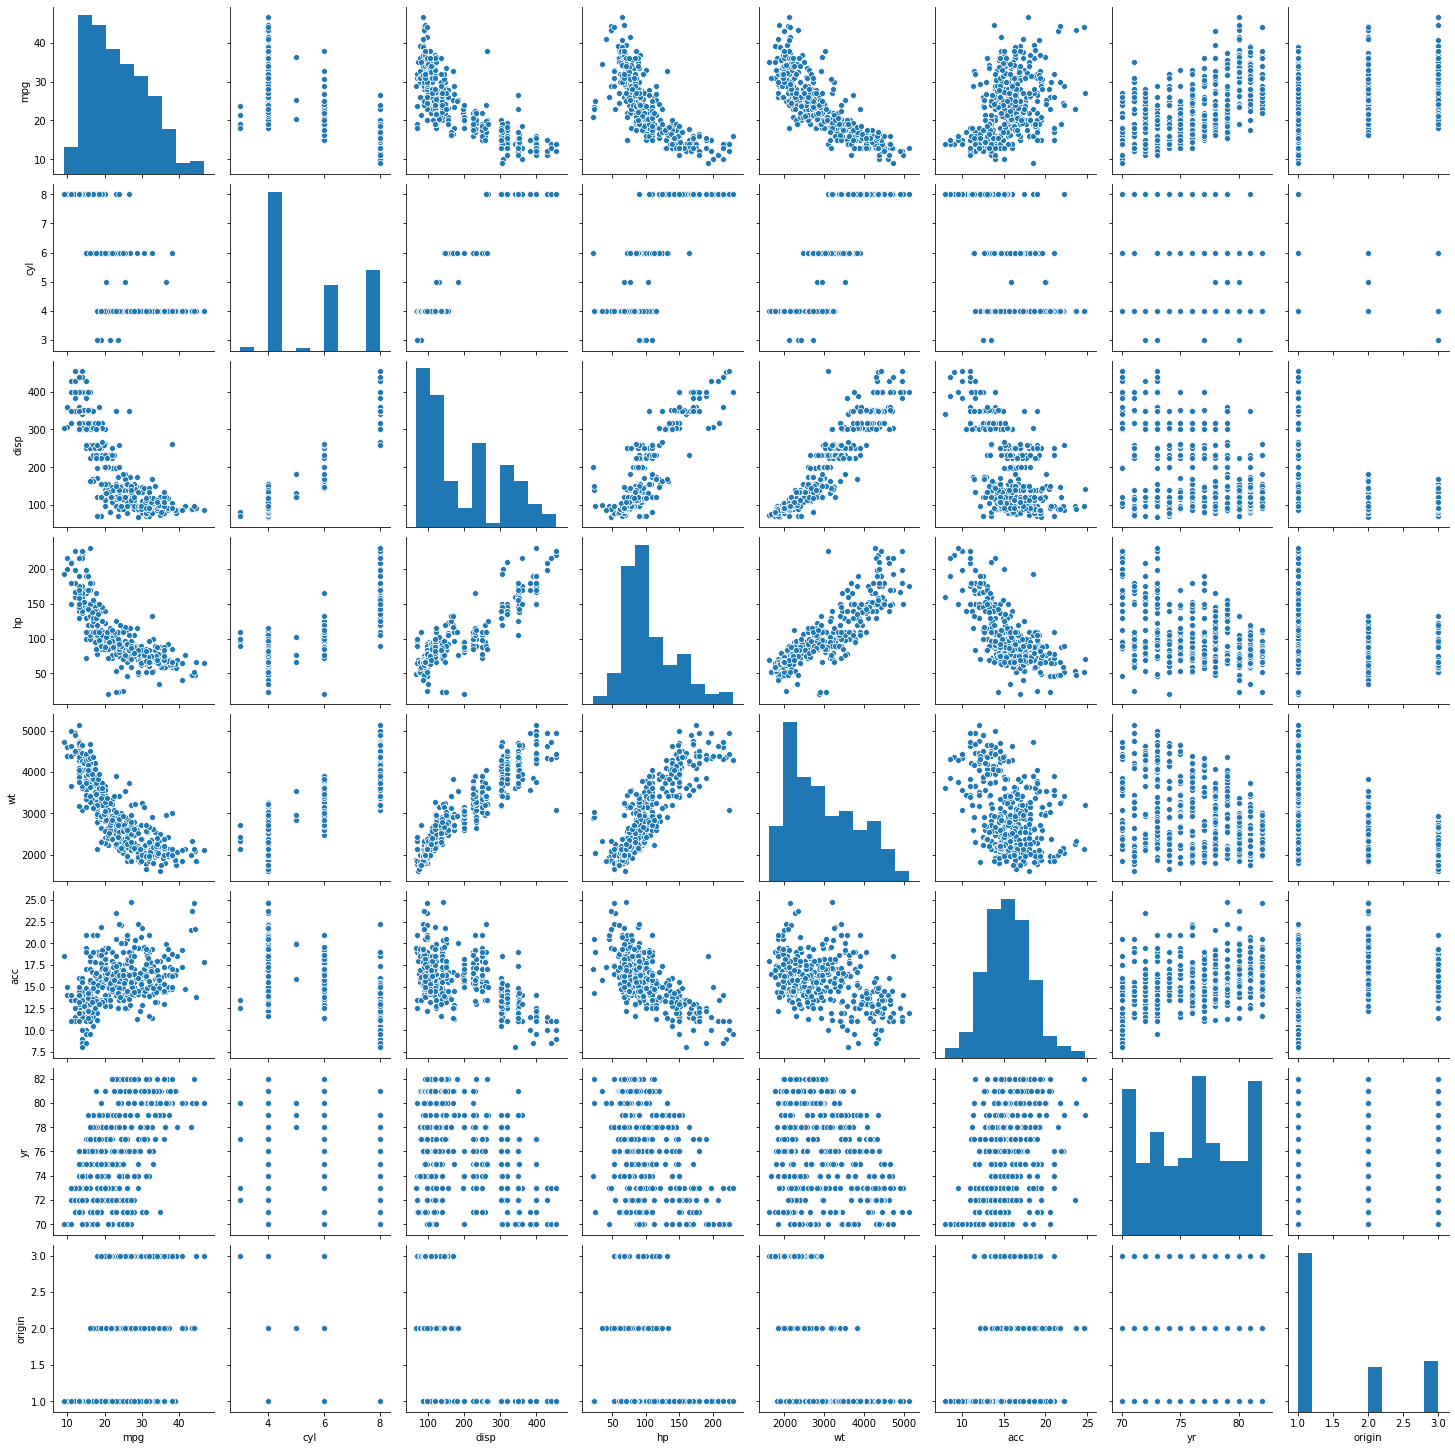

In [52]:
sns.pairplot(auto_pd[['mpg','cyl','disp','hp','wt','acc','yr','origin']])

In [53]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
X=auto_pd.drop(['mpg'],axis=1)
y=auto_pd['mpg']
Xscaled=X.apply(zscore)
Xscaled.head()

,cyl,disp,hp,wt,acc,yr,origin
0,1.498191,1.090604,0.679269,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.570250,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.188401,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.188401,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.933835,0.565841,-1.840117,-1.627426,-0.715145


In [54]:
np.cov(Xscaled,rowvar=False)

array([[ 1.00251889,  0.95311615,  0.83572171,  0.89827376, -0.50669259,
        -0.34962425, -0.56396033],
       [ 0.95311615,  1.00251889,  0.88748368,  0.93517383, -0.54505356,
        -0.37109656, -0.61094444],
       [ 0.83572171,  0.88748368,  1.00251889,  0.85299238, -0.68526589,
        -0.41551786, -0.4313627 ],
       [ 0.89827376,  0.93517383,  0.85299238,  1.00251889, -0.41850885,
        -0.30733654, -0.58248745],
       [-0.50669259, -0.54505356, -0.68526589, -0.41850885,  1.00251889,
         0.28886274,  0.20639158],
       [-0.34962425, -0.37109656, -0.41551786, -0.30733654,  0.28886274,
         1.00251889,  0.18111726],
       [-0.56396033, -0.61094444, -0.4313627 , -0.58248745,  0.20639158,
         0.18111726,  1.00251889]])

In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
Xscaled_6=pca.fit_transform(Xscaled)

In [56]:
pca.explained_variance_

array([4.5959209 , 0.94713238, 0.75229805, 0.48483455, 0.1350502 ,
       0.06835189])

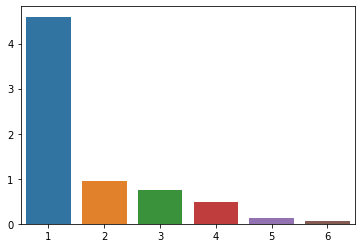

In [57]:
sns.barplot(x=[i for i in range(1,len(pca.explained_variance_)+1)],y=pca.explained_variance_)

In [58]:
np.cumsum(pca.explained_variance_)

array([4.5959209 , 5.54305328, 6.29535132, 6.78018587, 6.91523607,
       6.98358796])

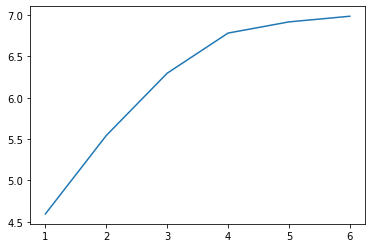

In [59]:
sns.lineplot(x=[i for i in range(1,len(pca.explained_variance_)+1)],y=np.cumsum(pca.explained_variance_))

In [61]:
pca=PCA(n_components=4)
Xscaled_4=pca.fit_transform(Xscaled)

In [62]:
Xscaled_4

array([[ 2.67317348,  0.9404935 ,  0.5792475 , -0.42804933],
       [ 3.39917521,  1.08005674,  0.30956302, -0.26904569],
       [ 3.01618735,  1.20344322,  0.29030183, -0.56898049],
       ...,
       [-0.89868955, -0.43797721, -1.6143389 , -1.87159313],
       [-1.60969228, -1.76128933, -0.23190205, -0.38536482],
       [-1.61899436, -1.91269797, -0.09063529, -0.1797025 ]])

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(Xscaled_4,y,random_state=1)

In [66]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print(lr.score(x_train,y_train))

0.774324337655258


In [68]:
print(lr.score(x_test,y_test))

0.8390086096224083


In [69]:
x_train,x_test,y_train,y_test=train_test_split(Xscaled,y,random_state=1)

In [70]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print(lr.score(x_train,y_train))

0.8105924113378014


In [72]:
print(lr.score(x_test,y_test))

0.8503801720433924
